In [8]:
import numpy as np
import scipy as sp
import pandas as pd
# from pandas import Series, Dataframe

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

from sklearn import linear_model

import requests, zipfile
from io import StringIO
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

student_data_math = pd.read_csv('student-mat.csv', sep=';')

In [9]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
?pd.read_csv

In [11]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [13]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

(array([287.,  72.,  25.,   5.,   1.,   2.,   0.,   2.,   0.,   1.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <a list of 10 Patch objects>)

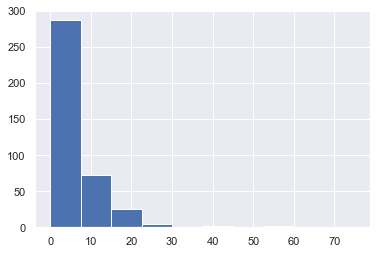

In [14]:
plt.hist(student_data_math['absences'])

In [17]:
print( student_data_math['absences'].mean())
print( student_data_math['absences'].median())
print( student_data_math['absences'].mode())
print( student_data_math['absences'].var())
print( student_data_math['absences'].std()) # 標準偏差

5.708860759493671
4.0
0    0
dtype: int64
64.04954057700951
8.003095687108177


In [18]:
print( student_data_math['absences'].describe())

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64


In [19]:
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.0

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c927dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c936850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c934110>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1c934e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c93c7d0>,
 'means': []}

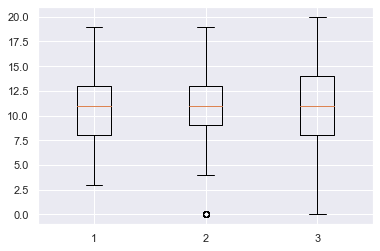

In [22]:
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])

In [24]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3']) # 相関係数　(2つ目はP値)

(0.801467932017414, 9.001430312277865e-90)

In [25]:
np.corrcoef([student_data_math['G1'], student_data_math['G3']]) # 相関行列

array([[1.        , 0.80146793],
       [0.80146793, 1.        ]])

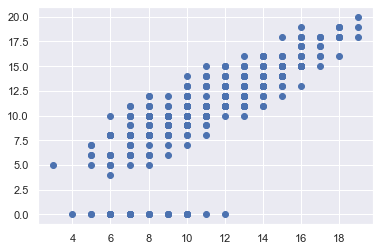

In [26]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

In [27]:
# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

In [30]:
X = student_data_math.loc[:, ['G1']].values
Y = student_data_math['G3'].values
reg.fit(X,Y)
print(reg.coef_, reg.intercept_)

[1.10625609] -1.6528038288004616


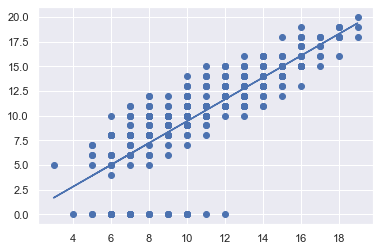

In [34]:
plt.scatter(X, Y)
plt.plot(X, reg.predict(X))

In [36]:
print(reg.score(X, Y)) #決定係数　（スコア）

0.64235084605227


In [39]:
dice_data = np.array([1, 2, 3, 4, 5, 6])
print(np.random.choice(dice_data, 1))

[4]


In [41]:
calc_steps = 1000
dice_rolls = np.random.choice(dice_data, calc_steps)
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(i, 'が出る確率', p)

1 が出る確率 0.167
2 が出る確率 0.196
3 が出る確率 0.156
4 が出る確率 0.169
5 が出る確率 0.144
6 が出る確率 0.168


<BarContainer object of 6 artists>

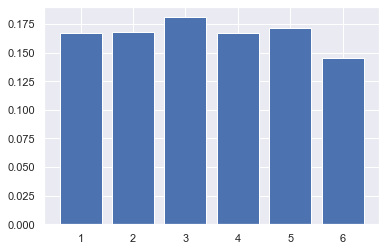

In [49]:
calc_steps = 1000
dice_rolls = np.random.choice(dice_data, calc_steps)
prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, p)

plt.bar(dice_data, prob_data)

In [50]:
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i, 'が出る確率', p)
    prob_be_data = np.append(prob_be_data, p)

0 が出る確率 0.625
1 が出る確率 0.375


([<matplotlib.axis.XTick at 0x106137890>,
 <a list of 2 Text xticklabel objects>)

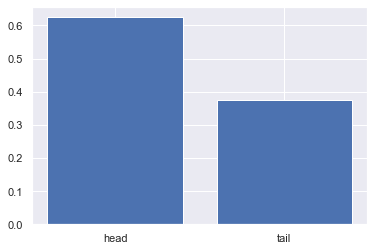

In [51]:
plt.bar([0, 1], prob_be_data, align='center')
plt.xticks([0, 1], ['head', 'tail'])

(array([  4.,  44.,  63., 174., 144., 261., 196.,  61.,  46.,   7.]),
 array([ 7. ,  8.6, 10.2, 11.8, 13.4, 15. , 16.6, 18.2, 19.8, 21.4, 23. ]),
 <a list of 10 Patch objects>)

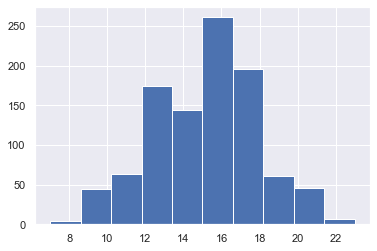

In [52]:
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)

(array([ 10.,  81., 225., 289., 134., 173.,  65.,  19.,   2.,   2.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

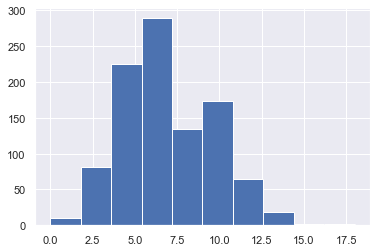

In [58]:
x = np.random.poisson(7, 1000)
plt.hist(x)

(array([  26.,  195.,  833., 2058., 2968., 2423., 1145.,  308.,   39.,
           5.]),
 array([-30.5725363 , -22.91492175, -15.2573072 ,  -7.59969265,
          0.05792191,   7.71553646,  15.37315101,  23.03076556,
         30.68838011,  38.34599466,  46.00360921]),
 <a list of 10 Patch objects>)

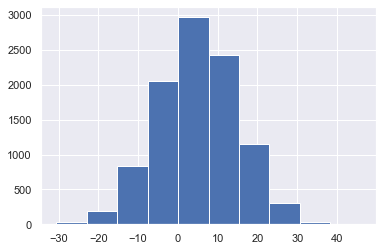

In [59]:
x = np.random.normal(5, 10, 10000)
plt.hist(x)

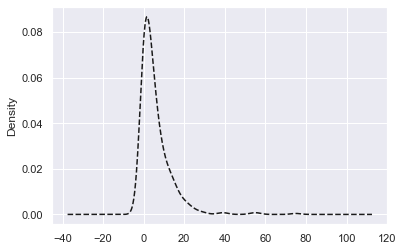

In [60]:
student_data_math.absences.plot(kind='kde', style='k--')

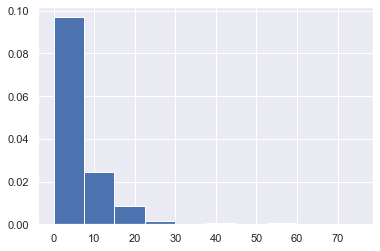

In [61]:
student_data_math.absences.hist(density=True)

In [62]:
?plt.hist

In [73]:
#2次元の正規分布をグラフで表示する

import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [74]:
x, y = np.mgrid[10:100:2, 10:100:2]
pos = np.empty(x.shape + (2, ))
pos[:, :, 0] = x 
pos[:, :, 1] = y 

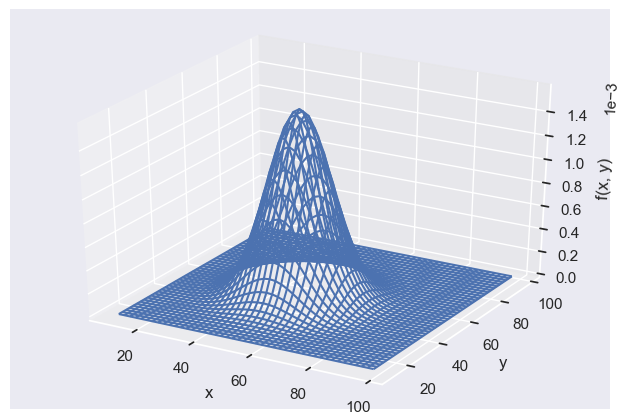

In [75]:
# 多次元正規分布
# それぞれの変数の平均と分散共分散行列を設定
# 以下の例では、xとyの平均がそれぞれ50と50、[[100, 0], [0, 100]]がxとyの共分散行列になります
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])

# 確率密度関数
z = rv.pdf(pos)

fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# x,y,zラベルの設定など
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# z軸の表示目盛り単位を変更、sciが指数表示、axisで軸を指定、scilimits=(n,m)はnからmの外にあるものは指数表記
# scilimits=(0,0)はすべて指数表記にするという意味
ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))

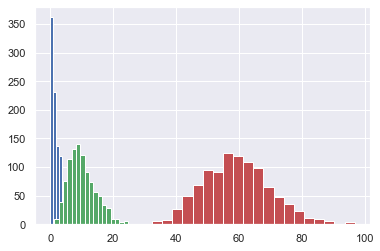

In [76]:
# カイ2乗分布
# 自由度2, 10, 60に従うカイ二乗分布が生成する乱数のヒストグラム
for df, c in zip([2, 10, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)

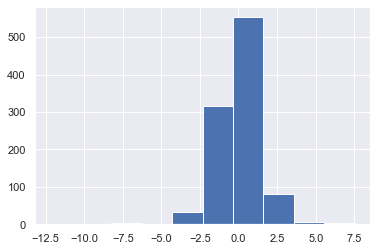

In [78]:
# t分布
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

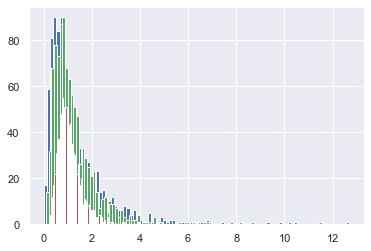

In [79]:
# F 分布
for df, c in zip([ (6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)